In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
path_to_file = 'transaction_data.csv'
path_to_file_upt = 'transaction_data_updated.csv'

transaction_data = pd.read_csv(path_to_file, parse_dates=['date'])
transaction_data

transaction_data_2 = pd.read_csv(path_to_file_upt, parse_dates=['date'])

In [67]:
# типы переменных
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [68]:
# размер таблицы
transaction_data.shape

(5315, 3)

In [69]:
# число пропущенных значений
transaction_data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [70]:
# Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню?
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

<Axes: xlabel='transaction', ylabel='count'>

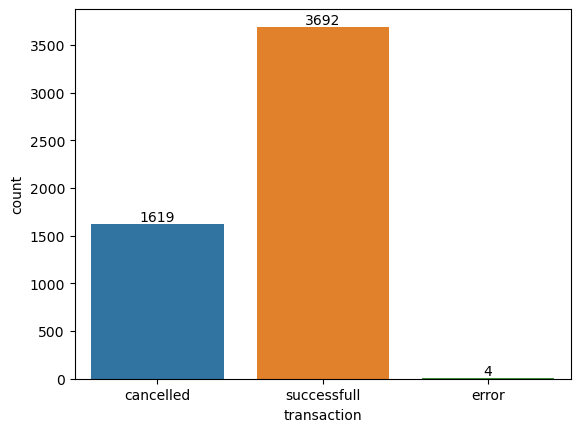

In [71]:
# Визуализируйте результат с помощью барплота
ax = sns.countplot(x='transaction',  data=transaction_data)
ax.bar_label(ax.containers[0], fontsize=10)
ax

In [72]:
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

user_transactions = transaction_data.query('transaction == "successfull"').groupby('name', as_index=False).agg({'transaction':'count'})

C:\Users\tvoya\AppData\Local\Temp\ipykernel_15368\2928683100.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_transactions.transaction)


<Axes: xlabel='transaction', ylabel='Density'>

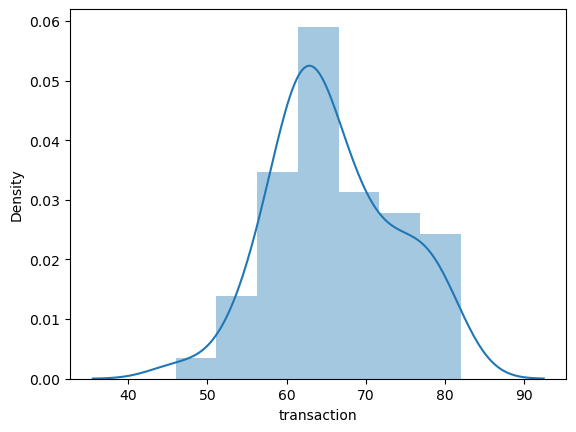

In [73]:
# Посмотрите на характеристики распределения,
# а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
# по оси x – число транзакций; по оси y – доля пользователей с таким числом транзакций

sns.distplot(user_transactions.transaction)

In [74]:
user_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [83]:
# 
transaction_data_2.sort_values('name')

,date,name,transaction,minute
1576,2020-03-02 00:24:09,Ekaterina_Fedorova,successfull,24
4462,2020-03-02 01:05:21,Ekaterina_Fedorova,successfull,5
2157,2020-03-02 00:09:04,Ekaterina_Fedorova,successfull,9
4455,2020-03-02 01:25:38,Ekaterina_Fedorova,cancelled,25
2165,2020-03-02 00:47:14,Ekaterina_Fedorova,cancelled,47
...,...,...,...,...
3957,2020-03-02 00:42:16,Vasilisa_Smirnova,successfull,42
2016,2020-03-02 00:14:57,Vasilisa_Smirnova,cancelled,14
3546,2020-03-02 01:01:52,Vasilisa_Smirnova,cancelled,1
3435,2020-03-02 01:08:43,Vasilisa_Smirnova,successfull,8


In [89]:
# Постройте сводную таблицу user_vs_minute_pivot, где:
        # столбцы – имена пользователей
        # строки – минута времени осуществления операции (minute)
        # значения – число совершённых операций
        # Пропущенные значения заполните нулями.

user_vs_minute = transaction_data_2.groupby(['name', 'minute']).agg({'transaction' : 'count'})
user_vs_minute_pivot = transaction_data_2.pivot_table(index='minute', columns='name', values='transaction', aggfunc='count', fill_value=0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


<Axes: xlabel='minute', ylabel='count'>

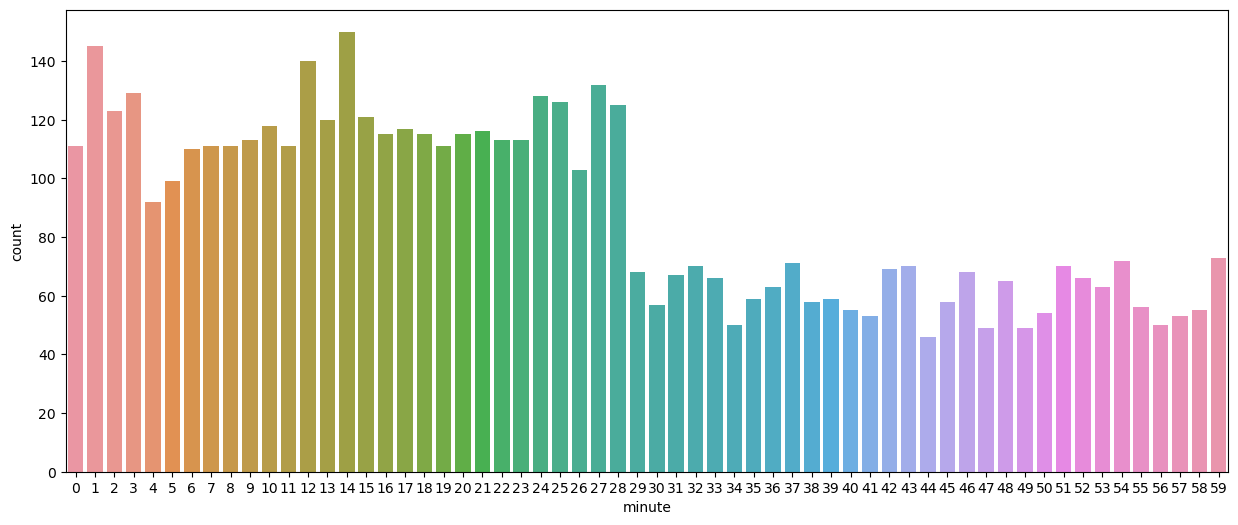

In [97]:
# график по сводной таблице из предыдущего шага

plt.figure(figsize =(15,6))
sns.countplot(x= 'minute', data = transaction_data_2)


In [100]:
# Посчитайте число минут, прошедших с начала дня. 
# Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

transaction_data_2['true_minute'] = transaction_data_2.date.dt.hour * 60 + transaction_data_2.date.dt.minute 
transaction_data_2

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<Axes: xlabel='true_minute', ylabel='count'>

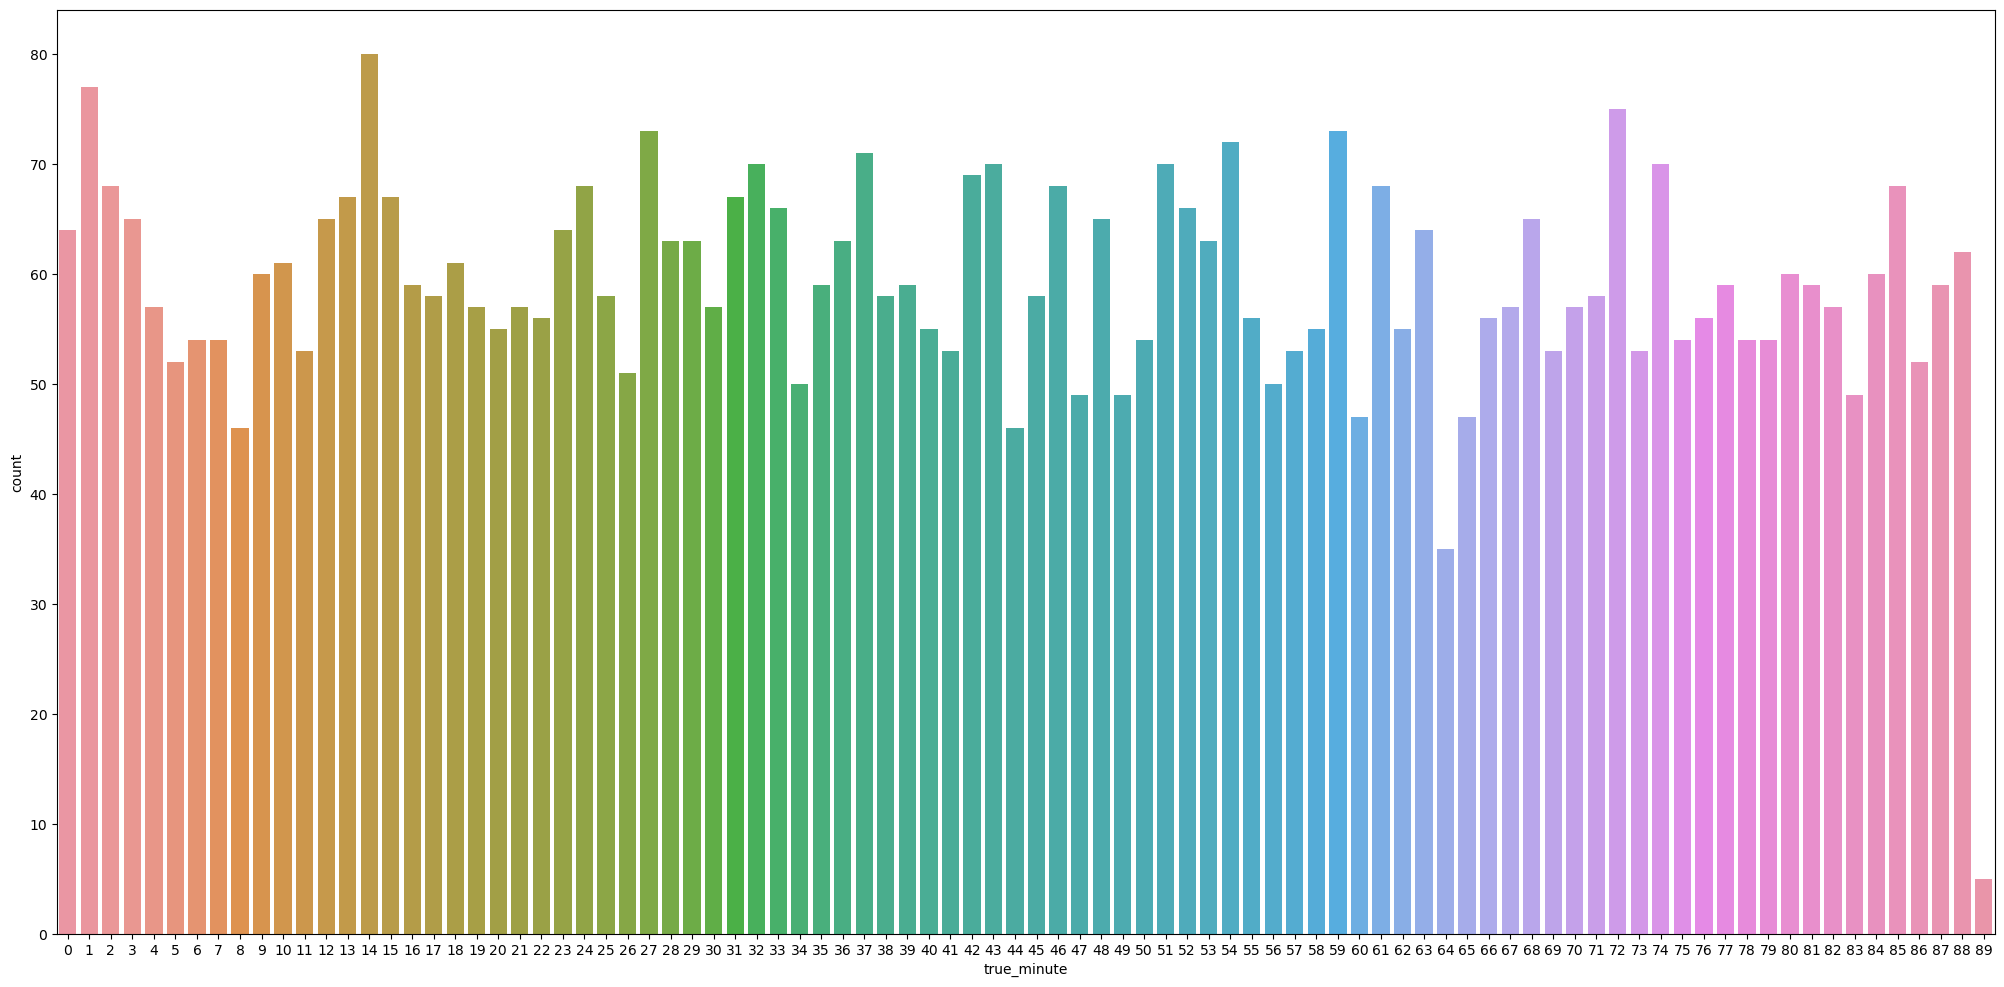

In [111]:
# Graphic

plt.figure(figsize =(25,12))
sns.countplot(x= 'true_minute', data = transaction_data_2)